## Solutions

#### Config

In [ ]:
## packages
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({
        'text.usetex': True,
        'font.family': 'serif',
    })

## toolkit
from src.triangulations import tri_circle, tri_rectangle
from src.fem import build_matricies, solve_fem

## config
save = False
tmax = 1000
dt = 0.01
triN = 16
L = 10
np.random.seed(0)

#### PDE

In [2]:
## pde config
N = 2
gamma = np.array([1, 0.02])
k1 = 9
k2 = 11
r = lambda u: np.column_stack((
        k1 * (u[:, 1] - u[:, 0] * u[:, 1] / (1 + u[:, 1]**2)),
        k2 - u[:, 1] - 4 * u[:, 0] * u[:, 1] / (1 + u[:, 1]**2),
    ))

#### Square Domain

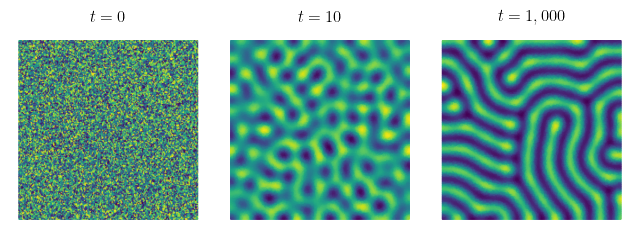

In [3]:
## triangulate the domain
pts, tris = tri_rectangle(L, L, triN)
damp_mat, stiff_mat = build_matricies(pts, tris)
n_pts = len(pts)

## solve the system
u0 = np.random.uniform(-1, 1, (n_pts, N))
u = solve_fem(r, gamma, tmax, dt, u0, damp_mat, stiff_mat)

## plot it
fig, axs = plt.subplots(1, 3)
fig.set_figwidth(6.5)
fig.set_figheight(2.5)
for ax in axs:
    ax.set_axis_off()
    ax.axis('equal')

# t = 0
axs[0].set_title('$t = 0$')
axs[0].tripcolor(
        pts[:, 0],
        pts[:, 1],
        u[0, :, 0],
        triangles=tris,
        shading='gouraud',
    )

# t = 10
axs[1].set_title('$t = 10$')
axs[1].tripcolor(
        pts[:, 0],
        pts[:, 1],
        u[int(np.ceil(10 / dt)), :, 0],
        triangles=tris,
        shading='gouraud',
    )

# t = 1000
axs[2].set_title(f'$t = {tmax:,}$')
axs[2].tripcolor(
        pts[:, 0],
        pts[:, 1],
        u[-1, :, 0],
        triangles=tris,
        shading='gouraud',
    )

## final things
fig.tight_layout()
if save: fig.savefig('paper/figures/square_ts.pdf', bbox_inches='tight')

## memory
del pts, tris, n_pts, stiff_mat, damp_mat, u0, u, fig, axs

#### Circle

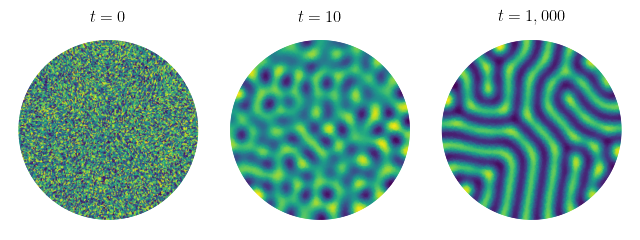

In [4]:
## triangulate the domain
pts, tris = tri_circle(L / 2, triN)
damp_mat, stiff_mat = build_matricies(pts, tris)
n_pts = len(pts)

## solve the system
u0 = np.random.uniform(-1, 1, (n_pts, N))
u = solve_fem(r, gamma, tmax, dt, u0, damp_mat, stiff_mat)

## plot it
fig, axs = plt.subplots(1, 3)
fig.set_figwidth(6.5)
fig.set_figheight(2.5)
for ax in axs:
    ax.set_axis_off()
    ax.axis('equal')

# t = 0
axs[0].set_title('$t = 0$')
axs[0].tripcolor(
        pts[:, 0],
        pts[:, 1],
        u[0, :, 0],
        triangles=tris,
        shading='gouraud',
    )

# t = 10
axs[1].set_title('$t = 10$')
axs[1].tripcolor(
        pts[:, 0],
        pts[:, 1],
        u[int(np.ceil(10 / dt)), :, 0],
        triangles=tris,
        shading='gouraud',
    )

# t = 1000
axs[2].set_title(f'$t = {tmax:,}$')
axs[2].tripcolor(
        pts[:, 0],
        pts[:, 1],
        u[-1, :, 0],
        triangles=tris,
        shading='gouraud',
    )

## final things
fig.tight_layout()
if save: fig.savefig('paper/figures/circle_ts.pdf', bbox_inches='tight')

## memory
del pts, tris, n_pts, stiff_mat, damp_mat, u0, u, fig, axs